## Project 6
### Brenden Latham, Ashish Yonzon, Afolabi Oluwatobi
### CPSMA-4413
### Dr. Jacob

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

For this project I will be using a dataset that I have used before and really enjoy working with. It has some nice relationships between variables. Let's see it.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/derby.csv')

In [ ]:
df

,#,Horse,Parentage,Points,Non-Restricted \nStakes Earnings,Career\nEarnings,Trainer,Breeder,Owner
0,1,Tiz the Law,Constitution—Tizfiz,372,"$2,572,400","$2,615,300",Barclay Tagg,Twin Creeks Farm,Sackatoga Stable
1,2,Authentic,Into Mischief—Flawless,200,"$2,840,000","$2,871,200",Bob Baffert,"Peter E. Blum Thoroughbreds, LLC","SF Racing LLC, Starlight Racing, Madaket Stabl..."
2,3,Art Collector,Bernardini—Distorted Legacy,150,"$476,461","$664,380",Joe Sharp,W. Bruce Lunsford,Bruce Lunsford
3,4,Honor A. P.,Honor Code—Hollywood Story,140,"$490,000","$532,200",John Shirreffs,George Krikorian,C R K Stable LLC
4,5,Ny Traffic,Cross Traffic—Mamie Reilly,110,"$472,820","$565,470","Saffie Joseph, Jr.",Brian Culnan,"Fanelli, John, Cash is King LLC, LC Racing and..."
5,6,King Guillermo,Uncle Mo—Slow Sand,90,"$317,050","$340,350",Juan Carlos Avila,"Carhue Investments, Grouseridge Ltd. & Marengo...",Victoria's Ranch
6,7,Thousand Words,Pioneerof the Nile—Pomeroys Pistol,83,"$297,000","$327,000",Bob Baffert,Hardacre Farm,Jerome S. Albaugh Family Stables LLC and Spend...
7,8,Dr Post,Quality Road—Mary Delaney,80,"$340,035","$370,635",Todd Pletcher,Cloyce C. Clark,St. Elias Stable
8,9,Max Player,Honor Code—Fools in Love,60,"$427,500","$463,500",Linda Rice,K & G Stables,George E. Hall
9,10,Caracaro,Uncle Mo—Peace Time,60,"$205,000","$238,800",Gustavo Delgado,SF Bloodstock LLC,"Global Thoroughbred and Top Racing, LLC"


Here we have the top 30 horses on the 2019 road to the Kentucky Derby. Out of these horses, the top 20 will compete in the Kentucky Derby. First we will examine the linear relationship between the horse's carreer earnings and their points scored in the series of 30 races on the road to the kentucky derby. This is linear because each race awards both points and money.

In [ ]:
df.columns = ("#", "Horse",	"Parentage", "Points",	"Non-Restricted Stakes Earnings", "Career Earnings", "Trainer",	"Breeder",	"Owner")
df['Career Earnings'] = df['Career Earnings'].str.replace(',', '')
df['Career Earnings'] = df['Career Earnings'].str.replace('$', '')
x = pd.to_numeric(df["Career Earnings"])
y = pd.to_numeric(df["Points"])
n = len(x)

<ipython-input-251-e8bb701030d2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Career Earnings'] = df['Career Earnings'].str.replace('$', '')


Let's look at how the data plots.

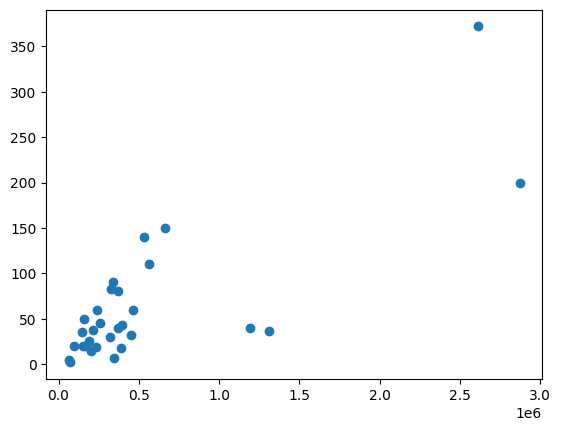

In [ ]:
plt.scatter(x,y)

I think we should scale this data a little bit to make it interesting

In [ ]:
x = np.log(x)
y = np.log(y)

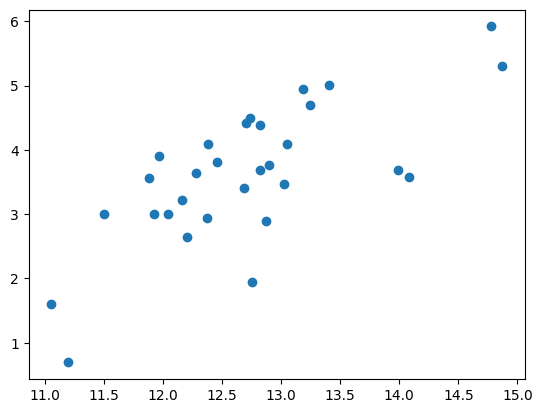

In [ ]:
plt.scatter(x,y)

Now to compute the slope and y-intercept

In [ ]:
a1 = (n*(np.sum(x*y)) - (np.sum(x)*np.sum(y))) / ((n*(np.sum(x**2))) - ((np.sum(x))**2))

a0 = ((np.sum(x**2)*np.sum(y)) - (np.sum(x)*np.sum(x*y))) / ((n*(np.sum(x**2))) - ((np.sum(x))**2))

In [ ]:
print("y-intercept:",a0)
print('slope: ',a1)

y-intercept: -7.479463178186199
slope:  0.8737189738943177


Now we can make our linear regression function

In [ ]:
def f(s):
  return(a0+(a1*s))

I will also make a function that uses numpy's built in linear regression for a comparison

In [ ]:
def g(s):
  m = stats.linregress(x,y).slope
  b = stats.linregress(x,y).intercept
  return(m*s+b)

Now le'ts see how our linear regression did.

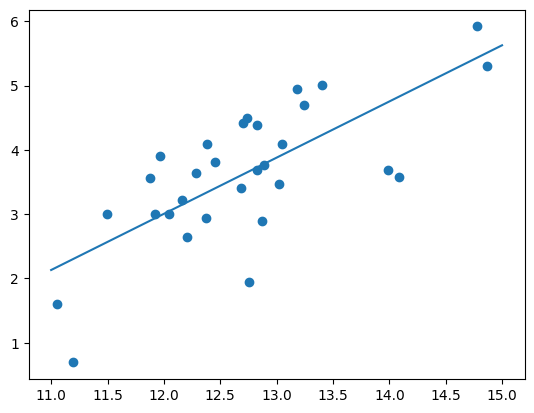

In [ ]:
t = np.linspace(11,15,30)
plt.scatter(x,y)
plt.plot(t,f(t))

Now we can compare to numpy's linear regression

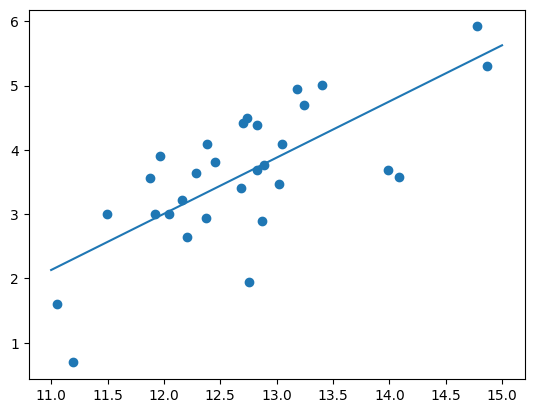

In [ ]:
t = np.linspace(11,15,30)
plt.scatter(x,y)
plt.plot(t,g(t))

It seems like we are spot on with our results. Let's now do some predicting. I want to predict how many points a horse has scored in the road to the kentucky derby given it's career earnings. Let's do a career earnings of $300,000

In [ ]:
def estimate(s):
  s = math.log(s)
  p = f(s)
  return(math.exp(p))

In [ ]:
estimate(300000)

34.44888554993213

So if a horse has earned $300,000 over it's career, we can predict that it was awarded 34.4 points on the road to the kentucky derby.

In [ ]:
def sum_residuals():
  r = 0
  for i in range(0,len(x)):
      r = r+f(x[i])-y[i]
  return(r)

Now we can look at the accuracy of out function by examining the sum of the residuals and the sum the the squares of the residuals. Idealy the sum of the residuals will be 0.

In [ ]:
print(sum_residuals())

3.0512259385773177e-12


We can see here we are pretty accurate, as our sum is very close to 0.

In [ ]:
def sum_residual_squares():
  r = 0
  for i in range(0,len(x)):
    r = r+(f(x[i])-y[i])**2
  return(r)

In [ ]:
print(sum_residual_squares())

16.26032233431183


Our sum of the squares is also very low. We achieved a very good linear regression for our data, and can now accurately predict the points scorced by a horse given it's career earnings.

Now we will examine the relationship between the horse's rank and it's awarded points. I believe this will be non-linear because a horses rank it based on it's points scored, while points scored is directly correlated to the skill of the horse. All the horses regularly compete in the same races, which will cause the most skilled horse's points to go exponentially depending on their skill. Technically the rank is directly dpendant on the points, though both are a direct result of the horse's skill. So I am taking the rank to be a measure of a horse's skill, and saying that the points awarded are dependant on this. This will make for a nice and simple set of points with an easy to see non-linear (I believe esponential) relationship. 

In [ ]:
x = pd.to_numeric(df["#"])
y = pd.to_numeric(df["Points"])

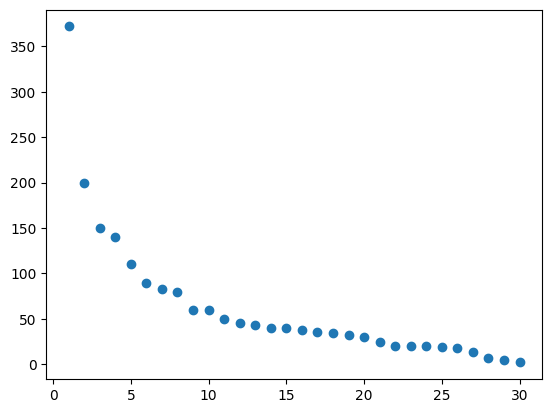

In [ ]:
plt.scatter(x,y)

Sure enough we have a nice exponential relationship. Firstly, do demonstrate the differences in methods, I will use a polynomial non-linear regression. I guess that a good non-linear regression will be of the following form.

### $$y = a_0x^2+a_1x+a_2 $$

So now we can make a system of equations given our points to find the coefficients.

In [ ]:
A = np.matrix([[n,np.sum(x),np.sum(x**2)],[np.sum(x),np.sum(x**2),np.sum(x**3)],[np.sum(x**2),np.sum(x**3),np.sum(x**4)]])
b = np.array([[np.sum(y)],[np.sum(x*y)],[np.sum(y*x**2)]])

In [ ]:
sol = np.linalg.inv(A).dot(b)
a0 = sol.item(0)
a1 = sol.item(1)
a2 = sol.item(2)

Now that we have the coefficients, let's see how this polynomial fits.

In [ ]:
def h(s):
  return(a0+(s*a1)+(a2*s**2))

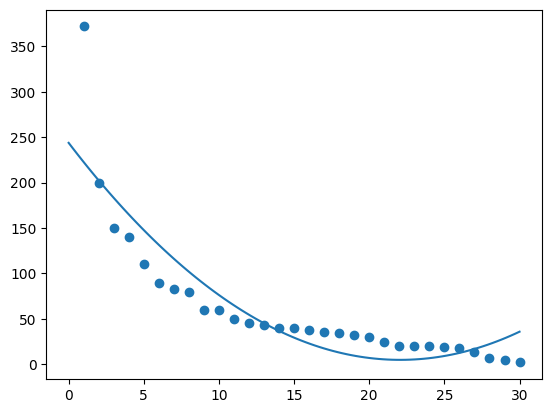

In [ ]:
t = np.linspace(0,30,100)
plt.scatter(x,y)
plt.plot(t,h(t))

Here we see that a polynomial somewhat fits, but I believe an exponential will be better. Let's try it out. I believe an equation of the following form would yield a better fit.

### $$y=ae^{bx} $$

I will use the newton-raphson method to find b, and from this we can then find a

In [ ]:
def f(s):
    return(np.sum(y*x*(np.exp(s*x))) - (np.sum(y*np.exp(s*x))/np.sum(np.exp(2*s*x))*np.sum(x*np.exp(2*x*s)))) 

def df(s):
    return((f(s+.000001)-f(s))/.000001)

In [ ]:
def newton_raphson(x0, error_tolerance=0.0001, max_iterations=1000):
    x_previous = x0
    results = []
    for i in range(max_iterations):
        fx = f(x_previous)
        dfx = df(x_previous)
        x = x_previous - fx/dfx
        error = abs((x - x_previous)/x)*100
        if error < error_tolerance:
            return results
        x_previous = x
        iteration,x_value,error_obtained = i,x,error
        results.append({ 'Root':x_value, 'Error':error_obtained, 'iteration':i+1})
    return "Error: Maximum number of iterations reached."
  
df = newton_raphson(10)
df[len(df)-1]

{'Root': -0.20030020515945116,
 'Error': 0.0004071469321493426,
 'iteration': 291}

In [ ]:
b = -0.20030020515945116

Now we can find a.

In [ ]:
a = np.sum(y*np.exp(x*b))/np.sum(np.exp(2*x*b))

Let's see how accurate this is.

In [ ]:
def h(s):
  return(a*np.exp(s*b))

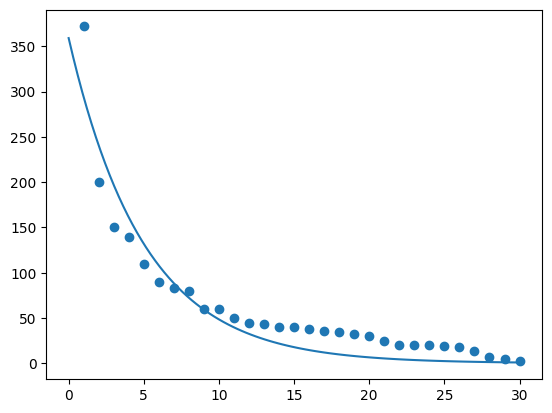

In [ ]:
t = np.linspace(0,30,100)
plt.scatter(x,y)
plt.plot(t,h(t))

This looks like a good prediction!

We are curiouse as to how this process would go with more data points, and especially how long the computation would take, so we are going to perform similar methods on some data with over 20,000 points as apposed the 30 points we have been looking at. Ashish will proceed with this

In [ ]:
# As  we dont see much of the non-linear relationship in the features columns itself we will be using a new data set 
from sklearn.datasets import fetch_california_housing
california_dataset = fetch_california_housing()

In [ ]:
california = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# assigning the target to MEDV column

california['MEDV'] = california_dataset.target

EDA

In [ ]:
# Checking for the null values

california.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

<Axes: >

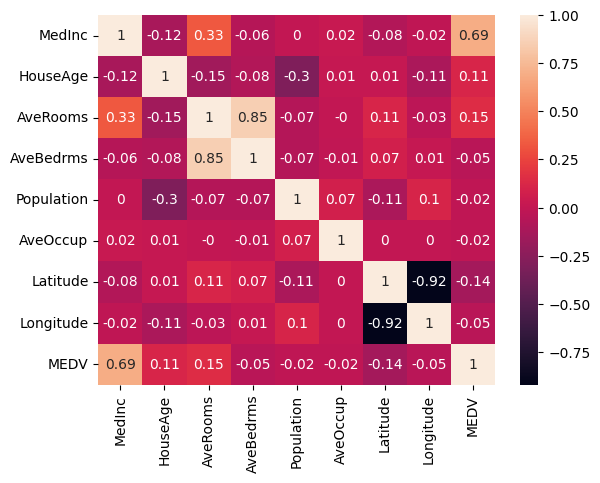

In [ ]:
# Fortunately we dont have the null values so I think we are good to go for the heatmap to find the non-linear columns
import seaborn as sns
correlation_matrix = california.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

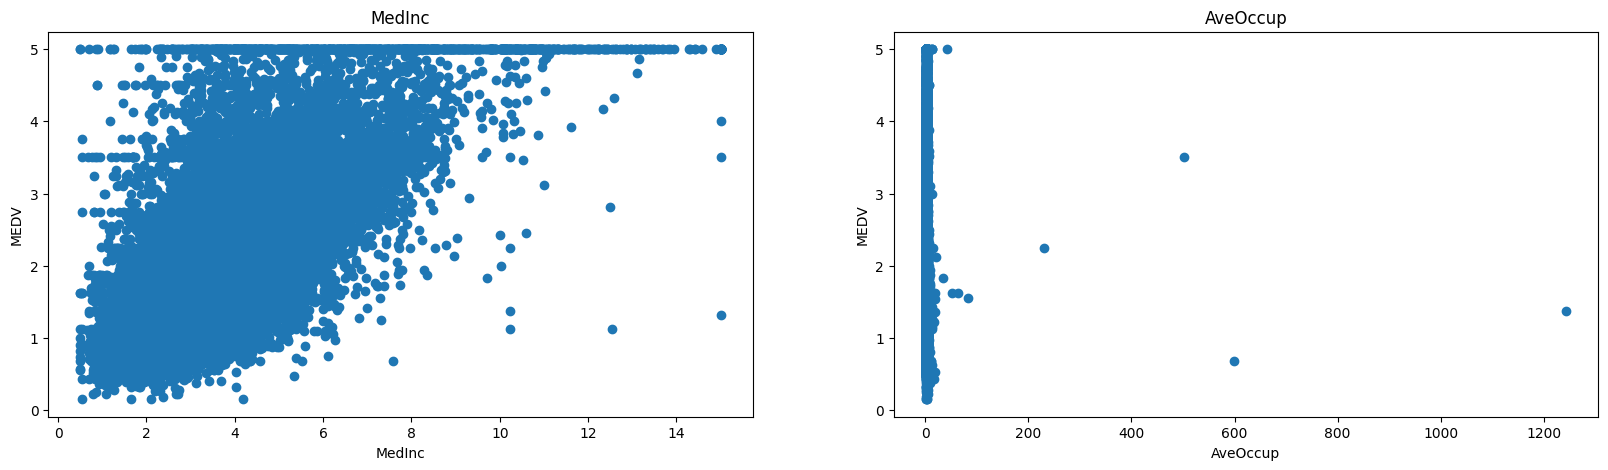

In [ ]:
# The target (MEDV) is correlated with MedInc linearly and AveOccup is not much correlated which can be verified with the graph too
plt.figure(figsize=(20, 5))

features = ['MedInc', 'AveOccup']
target = california['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = california[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
# We can see that MedInc vs MedV is kinda linear and AveOccup vs MEDV is not linear (clustered) so the linear regression won't make sense in this case



In [ ]:
def weight_bias(x,y):
    """weight = slope and bias = intercept """  
    xy= np.multiply(x,y)
    x_square = np.square(x)
    n = len(x)
    m=(n*np.sum(xy)-np.sum(x)*np.sum(y))/(n*np.sum(x_square)-np.sum(x)**2)
    b=(np.sum(y)-m*np.sum(x))/n
    return m ,b
    # Exactly to what Brenden has done we are finding the coefficient and intercept

In [ ]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

In [ ]:
def plot_graph(x_train,X_label,y_train,y_label,w,b):
    tmp_f_wb = compute_model_output(x_train, w, b)


    # Plot our model prediction
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
    plt.xlabel(X_label)
    plt.ylabel(y_label)
    plt.title('Graph')
    # Plot the data points
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')



    plt.legend()
    plt.show()

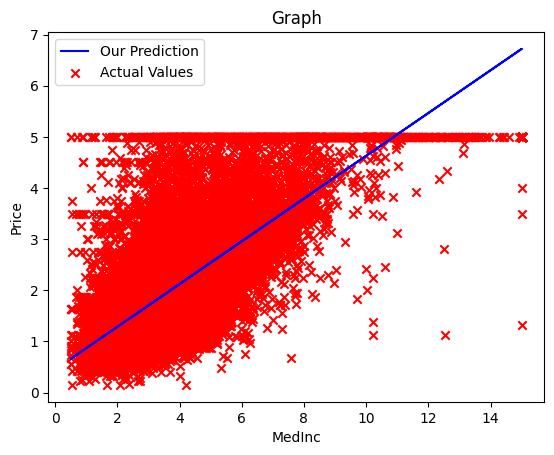

In [ ]:
X = np.array(california['MedInc'])
Y = np.array(california['MEDV'])
w,b= weight_bias(X,Y)
plot_graph(X,'MedInc',Y,'Price',w,b)
# Things look good for this model as it is linearly dependent

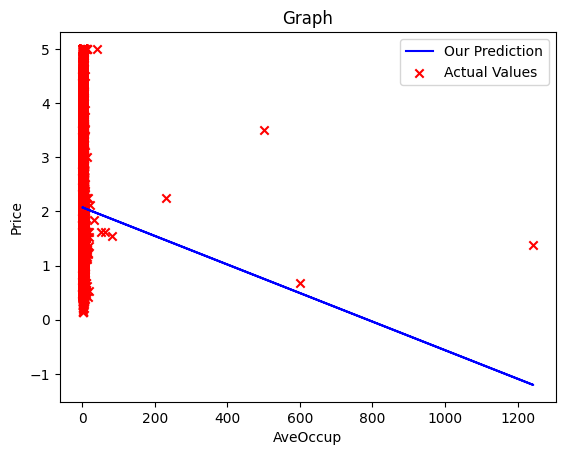

In [ ]:
X = np.array(california['AveOccup'])
Y = np.array(california['MEDV'])
w,b= weight_bias(X,Y)
plot_graph(X,'AveOccup',Y,'Price',w,b)
# Things are already messed up for this 

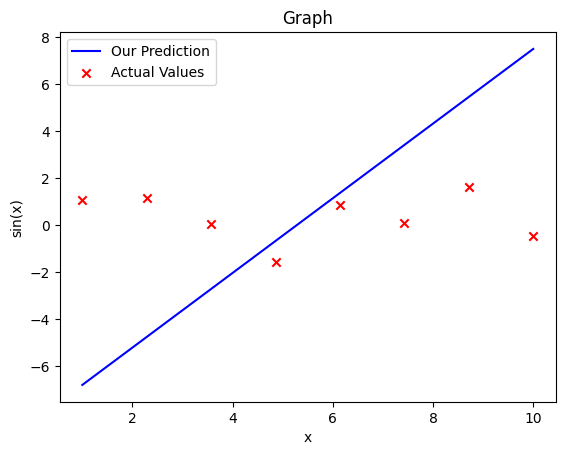

In [ ]:
# Generate N number of points from _FROM to _TO

x = np.linspace(1, 10+1e-3, 8)


# Get output from sin function with added noise
y = np.sin(x) + np.random.normal(scale=1, size=x.shape[0])
X = x.reshape((-1, 1))
w,b= weight_bias(X,y)
plot_graph(X,'x',y,'sin(x)',w,b)


**Summary**

 In linear regression, the slope denotes the change in the dependent variable for a one-unit increase in the independent variable, and the intercept denotes the predicted value of the dependent variable when the independent variable is equal to zero.


When the slope is positive and the intercept is negative,  this means that the regression line has a positive slope and crosses the y-axis below zero. With the calculated variable, we have a negative intercept and a positive slope.  This shows that when the independent(career earnings) variable is zero, the dependent(points) variable tends to increase along with the independent variable, but at a pace greater than zero.

To further more explain, on a day when the horse has a zero career earning there will be no points for the horse, but as the career earnig of the horse increases there should be an increase in points for the horse. 

It was appropriate to perform linear regress because we were able to see the relationship between the independent variable(career earnings) and the dependent variable(points).

For the non-linear regression we imported a new dataset and started off by hecking for null values; because there were no null values, we proceeded to using heat map.  Heat map was used to visualize the relationship between the independent and dependent variables, and to explore the patterns in the data. From the heat map we could deduce that the target Medv and AveOccup are not linearly correlated. 

To further more buttress, we did a scatter plot between the target and two different features(MedInc and AveOccup). Looking at the scatter plot, the target Medv and rhe feature AveOccup is a good fit of our non linear regression because the residuals are scattered around zero. If it was not a good fit, it should have a pattern. 

Using another target(price) against the same features (MedInc and AveOccup), AveOccup has residuals scattered at 0 and we can conlcude that is a good fit. 